# Installing libraries

In [160]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt


# Loading the dataset

In [161]:
# Load dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  #Labels (0 = malignant, 1 = benign)

In [162]:
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [163]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

## splitting and testing

In [164]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Function to evaluate models

In [165]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"Accuracy: {accuracy:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


# Models

1.	Decision Tree:
o	A single decision tree is trained with a maximum depth of 5 to prevent overfitting.
2.	Random Forest:
o	An ensemble of 100 decision trees is trained, each with a maximum depth of 5.
3.	XGBoost:
o	A gradient boosting model is trained with default parameters, using logloss as the evaluation metric.
4.	K-Nearest Neighbors (KNN):
o	A KNN model is trained with k=5 neighbors.


## Decision Tree

In [166]:
# 1. Decision Tree
print("Decision Tree:")
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
evaluate_model(dt_model, X_test, y_test)


Decision Tree:
Accuracy: 0.95
ROC AUC: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.96      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



## Random Forest

In [167]:
# 2. Random Forest
print("Random Forest:")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test)


Random Forest:


Accuracy: 0.96
ROC AUC: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



## XGBOOST

In [168]:
# 3. XGBoost
print("XGBoost:")
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
evaluate_model(xgb_model, X_test, y_test)


XGBoost:
Accuracy: 0.97
ROC AUC: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



c:\Users\moous\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:08:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## KNN

In [169]:
# 4. K-Nearest Neighbors (KNN)
print("K-Nearest Neighbors (KNN):")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
evaluate_model(knn_model, X_test, y_test)

K-Nearest Neighbors (KNN):
Accuracy: 0.96
ROC AUC: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.95      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



# Hyperparameter Tuning

## Define Model and parameter grid

### Decision Tree

In [170]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion : Gini impurity measures the likelihood of an incorrect classification, while entropy measures the information gain from a split.
    'max_depth': [None, 10, 20, 30, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2']  # Limits the number of features considered at each split, which can reduce overfitting : none (all features), sqrt (square root of features), log2 (log base 2 of features)
}

### Random forest

The final prediction is an average (for regression) or a majority vote (for classification) of all the trees.

In [171]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for splitting
}

### XGBoost

In [172]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds : The number of boosting rounds (trees).
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage: A smaller learning rate requires more trees but can lead to better generalization.
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'subsample': [0.7, 0.8, 1.0],  # Subsample ratio of the training instances : The fraction of samples used for training each tree (less than 1.0 introduces randomness and can prevent overfitting).
    # 'colsample_bytree': [0.8, 1.0],  # Subsample ratio of columns : the fraction of features used for training each tree.
    # 'gamma': [0, 0.1, 0.2],  # Minimum loss reduction to make a split : Higher values make the algorithm more conservative.
}

### KNN


In [173]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],  # Number of neighbors
    # 'weights': ['uniform', 'distance'],  # Weight function for prediction : if uniform then all neighbors have equal weight, if distance then closer neighbors have more influence.
    # 'metric': ['euclidean', 'manhattan']  # Distance metric
}

## Perform Gridsearch

In [174]:
from sklearn.model_selection import GridSearchCV

### Decision Tree

In [175]:
# Set up GridSearchCV
grid_search_dt = GridSearchCV(
    estimator= dt_model,
    param_grid= param_grid_dt,
    scoring='accuracy',  # Metric to evaluate
    cv=5,               # Number of cross-validation folds
    verbose=1,          # Print progress
    n_jobs=-1           # Use all available CPU cores
)

### Random Forest

In [176]:
# Set up GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring='accuracy',  # Metric to evaluate
    cv=5,               # Number of cross-validation folds
    verbose=1,          # Print progress
    n_jobs=-1           # Use all available CPU cores
)

### XGboost

In [177]:
# Set up GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring='accuracy',  # Metric to evaluate
    cv=5,               # Number of cross-validation folds
    verbose=1,          # Print progress
    n_jobs=-1           # Use all available CPU cores
)

### KNN

In [178]:
# Set up GridSearchCV
grid_search_knn = GridSearchCV(
    estimator= knn_model,
    param_grid=param_grid_knn,
    scoring='accuracy',  # Metric to evaluate
    cv=5,               # Number of cross-validation folds
    verbose=1,          # Print progress
    n_jobs=-1           # Use all available CPU cores
)

## Evaluate the best model and comparing performances

### Decision tree

In [179]:
# fit the model 
grid_search_dt.fit(X_train, y_train)
# Get the best model
best_model_dt = grid_search_dt.best_estimator_

# Evaluate on the test set
y_pred = best_model_dt.predict(X_test)

# Print the results
best_accuracy = grid_search_dt.best_score_
best_parameters = grid_search_dt.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Accuracy: 94.22 %
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.98      0.89      0.93       108

    accuracy                           0.92       171
   macro avg       0.91      0.93      0.91       171
weighted avg       0.93      0.92      0.92       171



### Random Forest

In [180]:
# fit the model 
grid_search_rf.fit(X_train, y_train)
# Get the best model
best_model_rf = grid_search_rf.best_estimator_

# Evaluate on the test set
y_pred = best_model_rf.predict(X_test)

# Print the results
best_accuracy = grid_search_rf.best_score_
best_parameters = grid_search_rf.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Accuracy: 96.22 %
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



### XGBoost

In [181]:
# fit the model 
grid_search_xgb.fit(X_train, y_train)
# Get the best model
best_model_xgb = grid_search_xgb.best_estimator_

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test)

# Print the results
best_accuracy = grid_search_xgb.best_score_
best_parameters = grid_search_xgb.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\moous\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:11:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Accuracy: 97.49 %
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        63
           1       0.97      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



### KNN


In [182]:
# fit the model 
grid_search_knn.fit(X_train, y_train)
# Get the best model
best_model_knn = grid_search_knn.best_estimator_

# Evaluate on the test set
y_pred = best_model_knn.predict(X_test)

# Print the results
best_accuracy = grid_search_knn.best_score_
best_parameters = grid_search_knn.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Accuracy: 91.45 %
Best Parameters: {'n_neighbors': 5}
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.95      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



# ROC curve
Plot the ROC curve for each model to visualize the trade-off between true positive rate and false positive rate.

### Function to plot 

In [183]:
from sklearn.metrics import roc_curve, auc

In [184]:
def plot_roc_curve(model, X_test, y_test, chosen_class):
    
  # Get predicted probabilities for the positive class
  y_pred_proba = model.predict_proba(X_test)[:, chosen_class]  # Probabilities for chosen class 

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

  # Step 6: Compute AUC (Area Under the Curve)
  roc_auc = auc(fpr, tpr)

  # Step 7: Plot the ROC curve
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.show()

#### Decision tree 

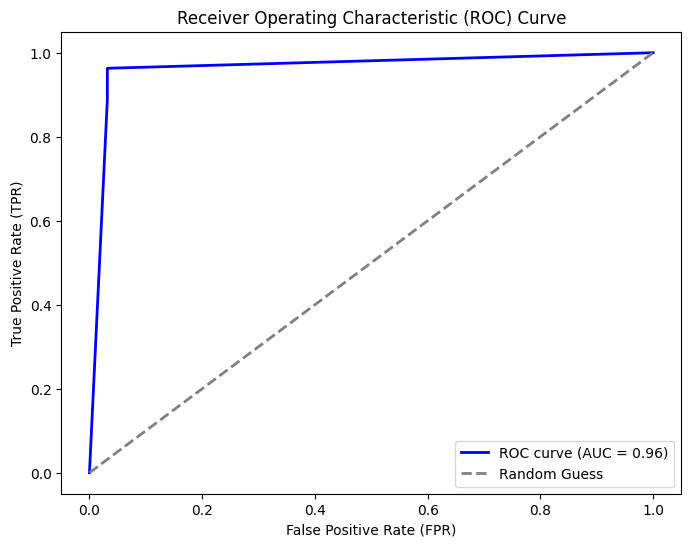

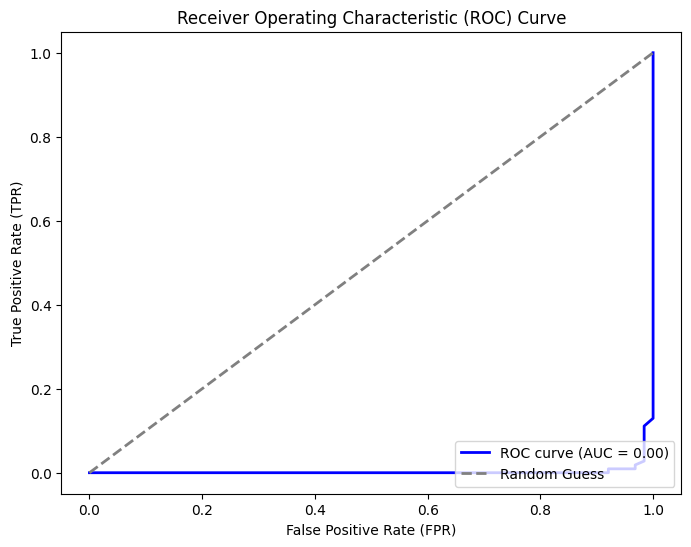

In [185]:
plot_roc_curve(best_model_dt, X_test, y_test, chosen_class=1)
plot_roc_curve(best_model_rf, X_test, y_test, chosen_class=0)

####  Random forest

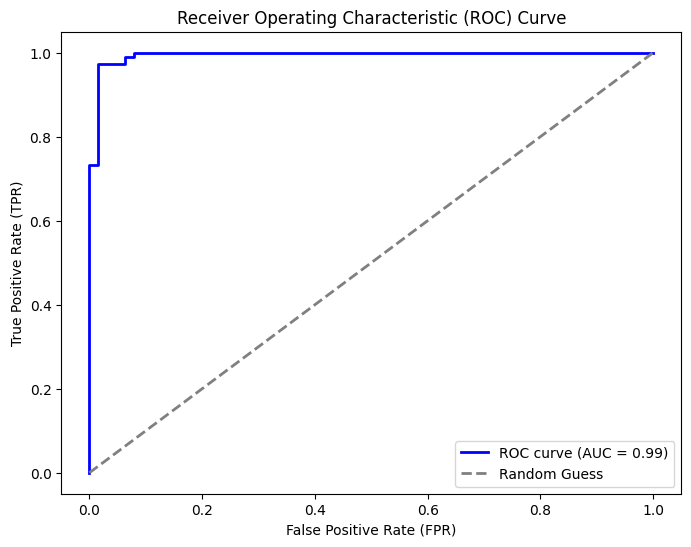

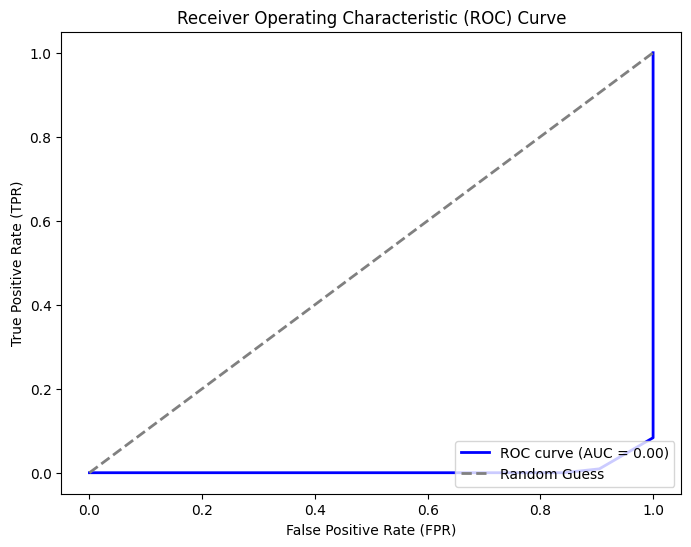

In [186]:
plot_roc_curve(best_model_xgb, X_test, y_test, chosen_class=1)
plot_roc_curve(best_model_knn, X_test, y_test, chosen_class=0)

####  XGBoost

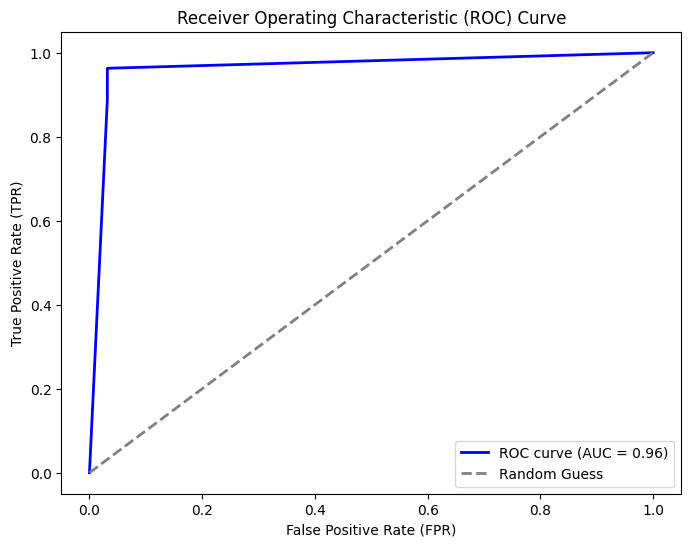

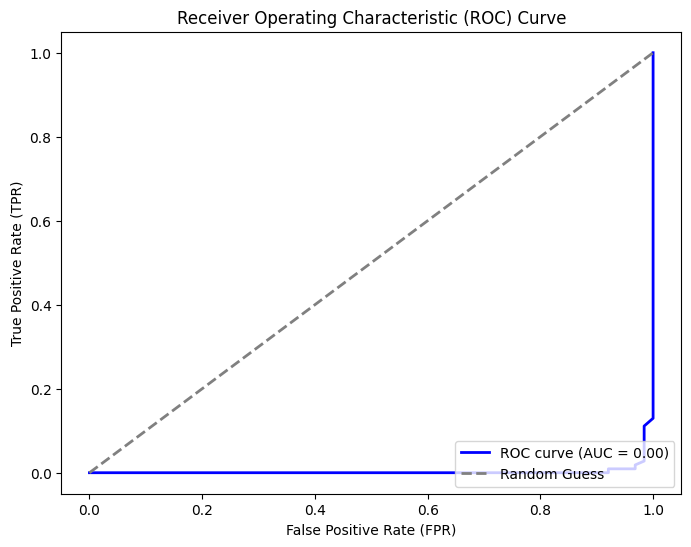

In [187]:
plot_roc_curve(best_model_dt, X_test, y_test, chosen_class=1)
plot_roc_curve(best_model_rf, X_test, y_test, chosen_class=0)

####  KNN

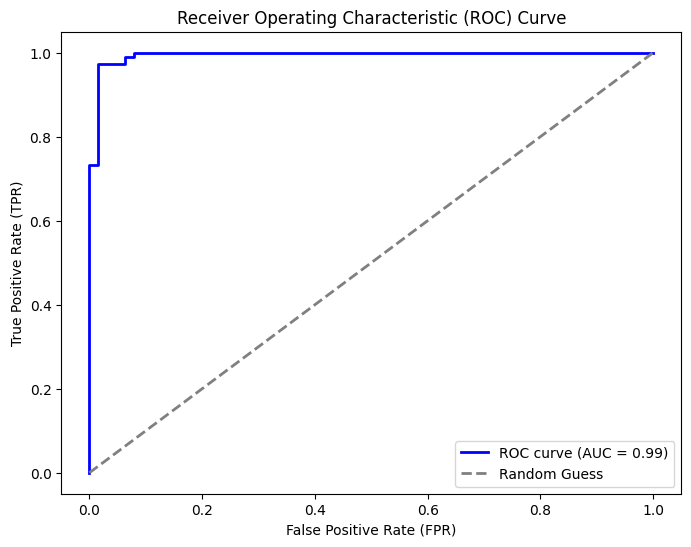

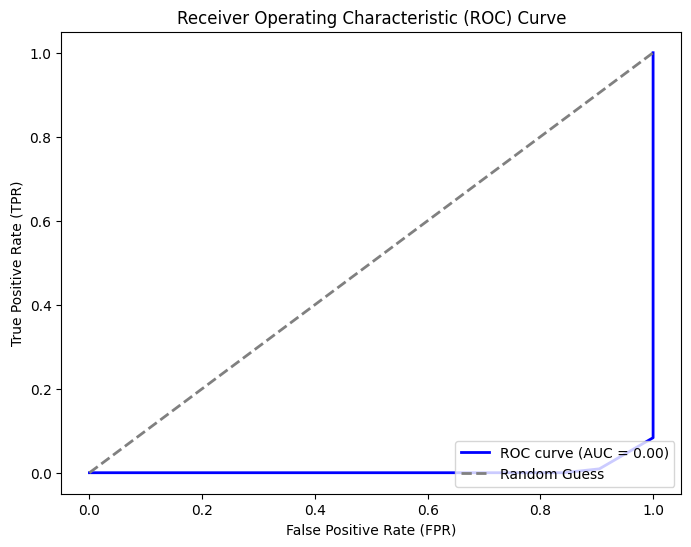

In [188]:
plot_roc_curve(best_model_xgb, X_test, y_test, chosen_class=1)
plot_roc_curve(best_model_knn, X_test, y_test, chosen_class=0)

# Feature Importance and Compare Feature Importance of each model

### Function for feature importance

In [189]:
def plot_feature_importance(model, data):
  # Plot feature importance for model
  importances = model.feature_importances_
  feature_names = data.feature_names
  indices = np.argsort(importances)[::-1] # Sort feature importances in descending order

  
  plt.figure(figsize=(10, 6))
  plt.title("Feature Importances of Model")
  plt.bar(range(X.shape[1]), importances[indices], align="center")
  plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
  plt.xlabel("Feature")
  plt.ylabel("Importance")
  plt.show()


#### Decision tree

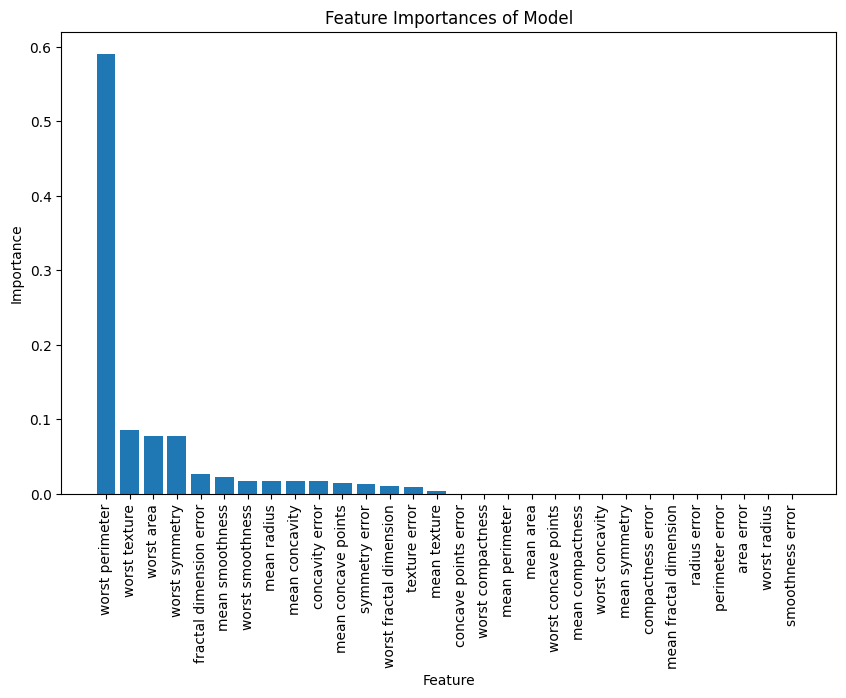

In [190]:
plot_feature_importance(best_model_dt, data)

We will consider the following 10 most important features : 
  - wort perimeter 
  - worst texture
  - worst area 
  - worst symmetry
  - fractal dimension error
  - mean smoothness
  - worst smoothness
  - mean radius
  - mean concavity
  - concavity error

#### Random forest
 

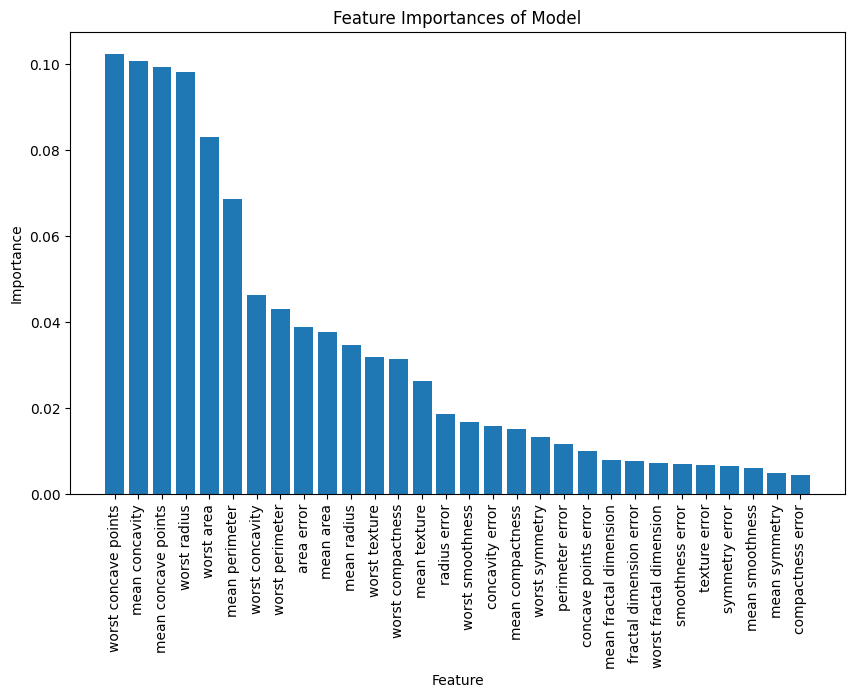

In [191]:
plot_feature_importance(best_model_rf, data)

the Random forest sees that the majority of features are important but we'll consider these 10 first :
  - worst concave points
  - mean concavity
  - mean concave points
  - worst radius
  - worst area
  - mean perimeter
  - worst concavity
  - worst perimeter
  - area error
  - mean area

####  XGBoost

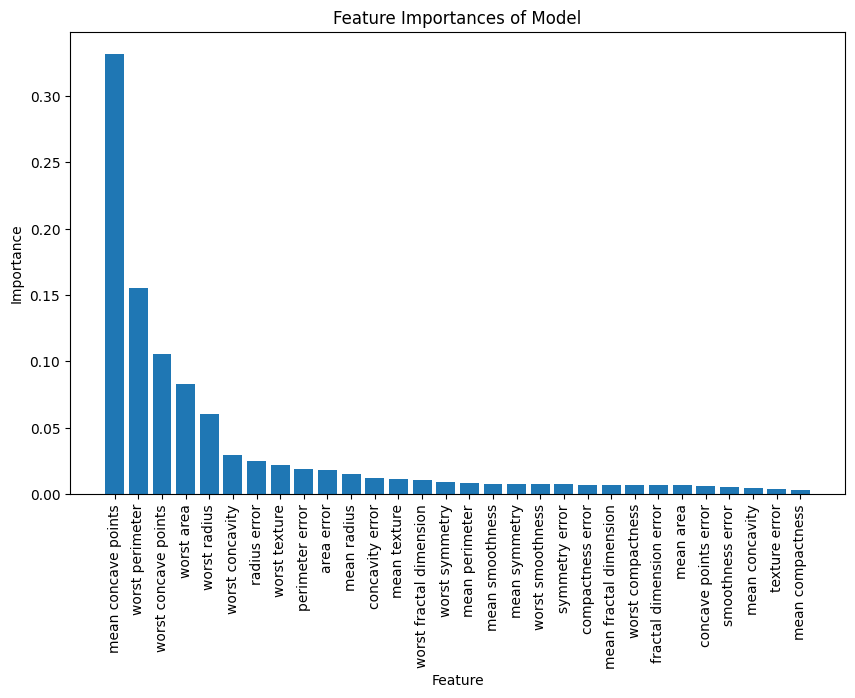

In [192]:
plot_feature_importance(best_model_xgb, data)

We are taking these 10 features :
  - mean concave points
  - worst perimeter
  - worst concave points
  - worst area
  - worst radius
  - worst concavity
  - radius error
  - worst texture
  - perimeter error
  - area error

### Function for KNN : because it does not have feature_importance
Permutation importance measures the increase in the model's prediction error after shuffling a feature. This method works for any model, including KNN.

In [193]:
from sklearn.inspection import permutation_importance

In [194]:
def plot_feature_importance_knn(model, X, y, feature_names):
    # Compute permutation importance
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42) # computes the importance of each feature by shuffling its values and measuring the change in the model's performance.
                                                                                # n_repeats : The number of times to shuffle each feature (default is 10).

    # Sort feature importances
    sorted_idx = result.importances_mean.argsort()[::-1] # each value represents the mean importance score of a feature across all shuffles.

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(X.shape[1]), result.importances_mean[sorted_idx], align='center')
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Permutation Importance')
    plt.title(f"Feature Importances of KNN classifier")
    plt.show()


#### KNN

In [195]:
feature_names = data.feature_names

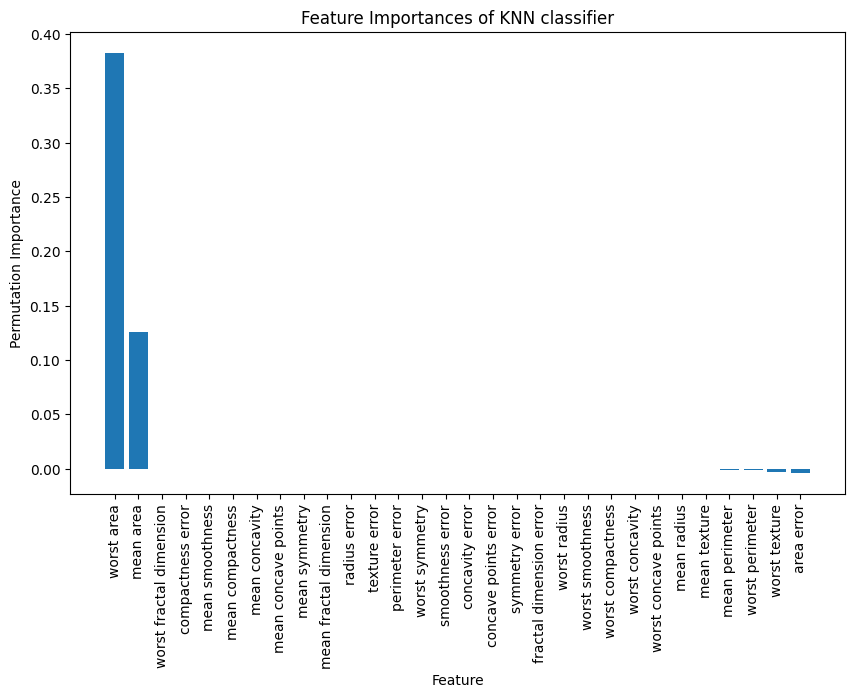

In [196]:
plot_feature_importance_knn(knn_model, X, y, feature_names) 

we are taking these features :
  - worst area
  - mean area
  - worst fractal dimension
  - compactness eorror
  - mean smoothness
  - mean compacthness
  - mean concavity
  - mean concave points
  - mean symmetru
  - mean fractal dimension

# Training models again based on feature selection

In [197]:
# we need to make X a dataframe to select features based on their names easily
X = pd.DataFrame(data.data, columns=data.feature_names)

### Decision Tree

In [201]:
selected_features = ['worst perimeter', 'worst texture', 'worst area', 'worst symmetry', 'worst perimeter', 'mean smoothness', 'worst smoothness', 'mean radius', 'mean concavity', 'concavity error']
X_selected = X[selected_features]
# Display the first 5 rows of the new feature matrix
print(X_selected.head())

   worst perimeter  worst texture  worst area  worst symmetry  \
0           184.60          17.33      2019.0          0.4601   
1           158.80          23.41      1956.0          0.2750   
2           152.50          25.53      1709.0          0.3613   
3            98.87          26.50       567.7          0.6638   
4           152.20          16.67      1575.0          0.2364   

   worst perimeter  mean smoothness  worst smoothness  mean radius  \
0           184.60          0.11840            0.1622        17.99   
1           158.80          0.08474            0.1238        20.57   
2           152.50          0.10960            0.1444        19.69   
3            98.87          0.14250            0.2098        11.42   
4           152.20          0.10030            0.1374        20.29   

   mean concavity  concavity error  
0          0.3001          0.05373  
1          0.0869          0.01860  
2          0.1974          0.03832  
3          0.2414          0.05661  
4  

In [202]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)


In [203]:
# 1. Decision Tree
print("Decision Tree:")
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
evaluate_model(dt_model, X_test, y_test)


Decision Tree:
Accuracy: 0.92
ROC AUC: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        63
           1       0.92      0.95      0.94       108

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



### Random forest 

In [204]:
# Select the specified features
selected_features = [
    'worst concave points', 
    'mean concavity', 
    'mean concave points', 
    'worst radius', 
    'worst area',
    'mean perimeter',
    'worst concavity',
    'worst perimeter',
    'area error',
    'mean area']

X_selected = X[selected_features]

# Display the first 5 rows of the new feature matrix
print(X_selected.head())

   worst concave points  mean concavity  mean concave points  worst radius  \
0                0.2654          0.3001              0.14710         25.38   
1                0.1860          0.0869              0.07017         24.99   
2                0.2430          0.1974              0.12790         23.57   
3                0.2575          0.2414              0.10520         14.91   
4                0.1625          0.1980              0.10430         22.54   

   worst area  mean perimeter  worst concavity  worst perimeter  area error  \
0      2019.0          122.80           0.7119           184.60      153.40   
1      1956.0          132.90           0.2416           158.80       74.08   
2      1709.0          130.00           0.4504           152.50       94.03   
3       567.7           77.58           0.6869            98.87       27.23   
4      1575.0          135.10           0.4000           152.20       94.44   

   mean area  
0     1001.0  
1     1326.0  
2     1203.

In [205]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)


In [206]:
# 2. Random Forest
print("Random Forest:")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test)


Random Forest:


Accuracy: 0.96
ROC AUC: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.95      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



### XGBoost

In [207]:
# Select the specified features
selected_features = [
    'mean concave points', 
    'worst perimeter', 
    'worst concave points', 
    'worst area',
    'worst radius',
    'worst concavity',
    'radius error',
    'worst texture',
    'perimeter error',
    'area error']

X_selected = X[selected_features]

In [208]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)


In [209]:
# 3. XGBoost
print("XGBoost:")
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
evaluate_model(xgb_model, X_test, y_test)


XGBoost:
Accuracy: 0.95
ROC AUC: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        63
           1       0.96      0.95      0.96       108

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



c:\Users\moous\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:12:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### KNN

In [210]:
# Select the specified features
selected_features = [
    'mean area',
    'worst area',
    'worst fractal dimension',
    'compactness error',
    'mean smoothness',
    'mean compactness',
    'mean concavity',
    'mean concave points',
    'mean symmetry',
    'mean fractal dimension']

X_selected = X[selected_features]

In [211]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)


In [212]:
# 4. K-Nearest Neighbors (KNN)
print("K-Nearest Neighbors (KNN):")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
evaluate_model(knn_model, X_test, y_test)

K-Nearest Neighbors (KNN):


Accuracy: 0.95
ROC AUC: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        63
           1       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



There isnt a big difference betwenn considering all 10 top most inmportant features and all features 
- Accuracies comparisons ( 10 top / all)
  - Decision tree: 0.92 / 0.95
  - Random forest: 0.96 / 0.96
  - XGboost : 0.95 / 0.97
  - KNN : 0.95 / 0.96